In [1]:
import numpy as np
import pandas as pd

DATASET_FILE_PATH: str = 'data/dataset.csv'

# Load dataset
dataset = pd.read_csv(DATASET_FILE_PATH)

In [2]:
# Preview the dataset
dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


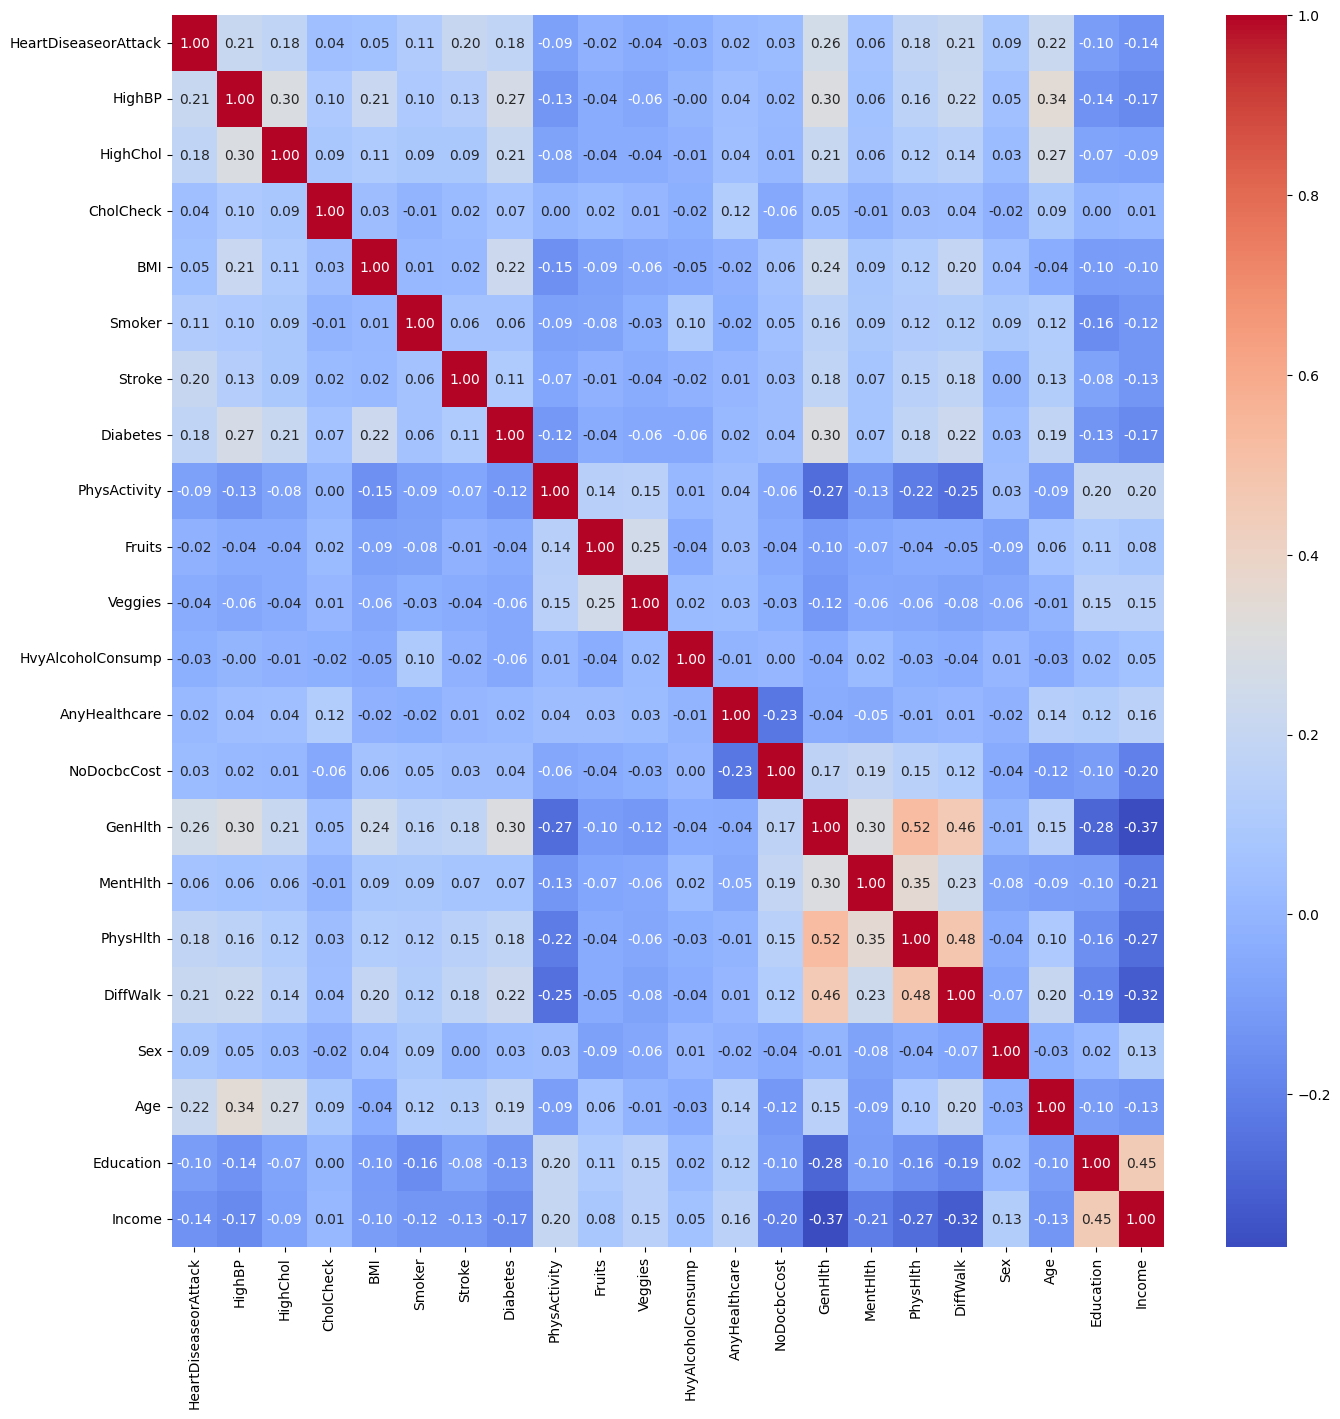

In [3]:
# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [4]:
# Remove uncorrelated columns
cleaned_dataset = dataset.drop(columns=['Sex', 'HvyAlcoholConsump', 'BMI', 'AnyHealthcare', 'Fruits', 'Veggies', 'NoDocbcCost', 'MentHlth', 'CholCheck', "GenHlth", "Education", "Income", "PhysActivity"])

# Preview the dataset
cleaned_dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,Diabetes,PhysHlth,DiffWalk,Age
0,0.0,1.0,1.0,1.0,0.0,0.0,15.0,1.0,9.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,0.0,0.0,0.0,30.0,1.0,9.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0


In [5]:
# Normalize the dataset using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_dataset = pd.DataFrame(scaler.fit_transform(cleaned_dataset), columns=cleaned_dataset.columns)

# Preview the dataset
normalized_dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,Diabetes,PhysHlth,DiffWalk,Age
0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.666667
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.500000
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.666667
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.833333


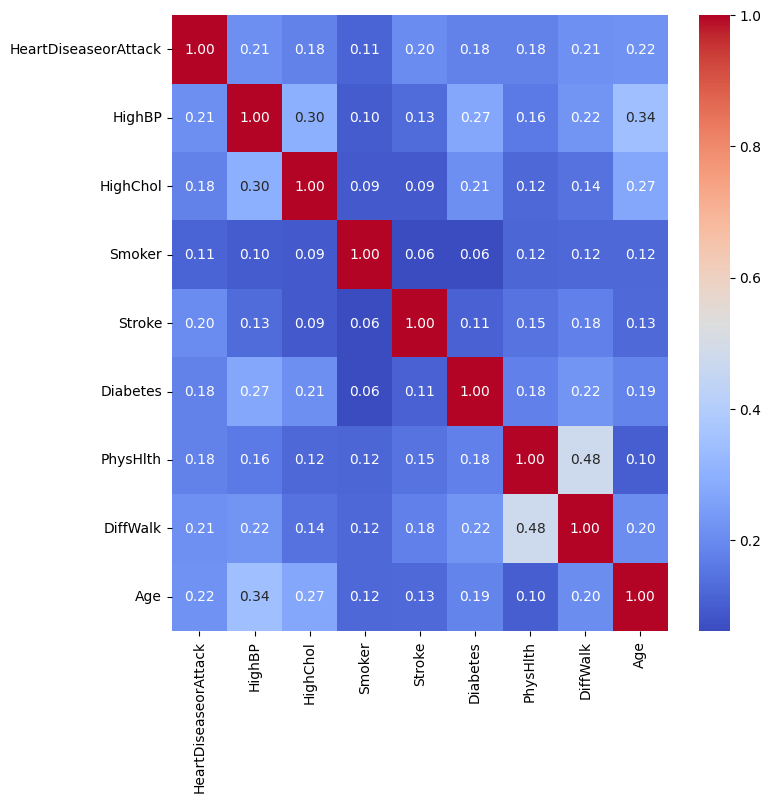

In [6]:
# Plot the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(normalized_dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [7]:
# Test multiple classification models on the cleaned dataset, first let's split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = normalized_dataset.drop(columns=['HeartDiseaseorAttack'])
y = normalized_dataset['HeartDiseaseorAttack']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    # 'AdaBoost': AdaBoostClassifier(),
    # 'Support Vector Machine': SVC(), too slow to run
    'Decision Tree': DecisionTreeClassifier(),
    # 'Neural Network': MLPClassifier()
}

class_weights = {
    0: normalized_dataset.shape[0] / (2 * np.bincount(y)[0]),
    1: normalized_dataset.shape[0] / (2 * np.bincount(y)[1])
}

for model_name, model in models.items():
    try:
        model.set_params(class_weight=class_weights)
    except ValueError:
        pass
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy}')
    print(f'{model_name} classification report:')
    print(classification_report(y_test, y_pred))
    print(f'{model_name} confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()


Logistic Regression accuracy: 0.7309208451592557
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     45968
           1       0.23      0.77      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.79     50736

Logistic Regression confusion matrix:
[[33398 12570]
 [ 1082  3686]]

Random Forest accuracy: 0.738647114474929
Random Forest classification report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     45968
           1       0.22      0.70      0.33      4768

    accuracy                           0.74     50736
   macro avg       0.59      0.72      0.59     50736
weighted avg       0.89      0.74      0.79     50736

Random Forest confusion matrix:
[[34140 11828]
 [ 1432  3336]]

Decision Tree accuracy: 0.722544150110375

In [9]:
# # Make sure my GPU is detected
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# # physical_devices = tf.config.experimental.list_physical_devices('GPU')
# # tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [12]:
# Since sklearn doesn't support class weights for MLPClassifier, we will use tensorflow to build a neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def weighted_binary_crossentropy(weights):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        weights_v = y_true * weights[1] + (1. - y_true) * weights[0]
        return tf.keras.backend.binary_crossentropy(y_true, y_pred) * weights_v
    return loss
with tf.device('/CPU:0'):
    tensorflow_models = {
        'Neural Network 1': Sequential([
            Dense(64, activation='relu', input_shape=(X.shape[1],)),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ]),
        'Neural Network 2': Sequential([
            Dense(128, activation='relu', input_shape=(X.shape[1],)),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ]),
        'Neural Network 3 w/ Dropout': Sequential([
            Dense(64, activation='relu', input_shape=(X.shape[1],)),
            Dropout(0.5),
            Dense(32, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ]),
        'Neural Network 4 w/ Dropout': Sequential([
            Dense(128, activation='relu', input_shape=(X.shape[1],)),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(32, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ]),
        'Neural Network 5': Sequential([
            Dense(64, activation='relu', input_shape=(X.shape[1],)),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    }

/home/rasooly/miniconda3/envs/ECS170Project/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
with tf.device('/CPU:0'):

    results = {}
    
    for model_name, model in tensorflow_models.items():
        print(f'Training {model_name}...')
        model.compile(optimizer=Adam(),
                    loss=weighted_binary_crossentropy([class_weights[0], class_weights[1]]),
                    metrics=['accuracy'])
        model.summary()

        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

        y_pred = model.predict(X_test)
        y_pred = np.round(y_pred)

        results[model_name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

Training Neural Network 1...


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 900us/step - accuracy: 0.7057 - loss: 0.5042 - val_accuracy: 0.7255 - val_loss: 0.5131
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 827us/step - accuracy: 0.7110 - loss: 0.5035 - val_accuracy: 0.7063 - val_loss: 0.5108
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 832us/step - accuracy: 0.7113 - loss: 0.5017 - val_accuracy: 0.6865 - val_loss: 0.5121
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 803us/step - accuracy: 0.7051 - loss: 0.5074 - val_accuracy: 0.7550 - val_loss: 0.5186
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 783us/step - accuracy: 0.7104 - loss: 0.5023 - val_accuracy: 0.7019 - val_loss: 0.5109
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 789us/step - accuracy: 0.7057 - loss: 0.5082 - val_accuracy: 0.6850 - val_loss: 0.5109
Epoch 7/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 792us/step - accuracy: 0.7053 - loss: 0.5068 - val_accuracy: 0.7016 - val_loss: 0.5117
Epoch 8/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 781us/step - accuracy: 0.7033 -

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 919us/step - accuracy: 0.6966 - loss: 0.5286 - val_accuracy: 0.6571 - val_loss: 0.5224
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 851us/step - accuracy: 0.7002 - loss: 0.5135 - val_accuracy: 0.6579 - val_loss: 0.5135
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 866us/step - accuracy: 0.7059 - loss: 0.5099 - val_accuracy: 0.6813 - val_loss: 0.5141
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 915us/step - accuracy: 0.6955 - loss: 0.5085 - val_accuracy: 0.6714 - val_loss: 0.5178
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 898us/step - accuracy: 0.7023 - loss: 0.5111 - val_accuracy: 0.7208 - val_loss: 0.5200
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 864us/step - accuracy: 0.7000 - loss: 0.5110 - val_accuracy: 0.7527 - val_loss: 0.5183
Epoch 7/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 836us/step - accuracy: 0.7100 - loss: 0.5052 - val_accuracy: 0.6955 - val_loss: 0.5118
Epoch 8/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 888us/step - accuracy: 0.7040 -

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 6s 941us/step - accuracy: 0.6487 - loss: 0.5803 - val_accuracy: 0.6938 - val_loss: 0.5148
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 862us/step - accuracy: 0.6844 - loss: 0.5315 - val_accuracy: 0.6711 - val_loss: 0.5129
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 840us/step - accuracy: 0.6821 - loss: 0.5288 - val_accuracy: 0.6564 - val_loss: 0.5131
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 859us/step - accuracy: 0.6824 - loss: 0.5172 - val_accuracy: 0.7228 - val_loss: 0.5172
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 849us/step - accuracy: 0.6859 - loss: 0.5225 - val_accuracy: 0.6736 - val_loss: 0.5121
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 848us/step - accuracy: 0.6824 - loss: 0.5244 - val_accuracy: 0.6839 - val_loss: 0.5124
Epoch 7/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 842us/step - accuracy: 0.6898 - loss: 0.5248 - val_accuracy: 0.6719 - val_loss: 0.5126
Epoch 8/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 913us/step - accuracy: 0.6825 -

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6663 - loss: 0.5807 - val_accuracy: 0.7463 - val_loss: 0.5221
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6877 - loss: 0.5310 - val_accuracy: 0.7240 - val_loss: 0.5170
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 943us/step - accuracy: 0.6891 - loss: 0.5320 - val_accuracy: 0.6490 - val_loss: 0.5202
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 933us/step - accuracy: 0.6911 - loss: 0.5349 - val_accuracy: 0.6864 - val_loss: 0.5147
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 939us/step - accuracy: 0.6878 - loss: 0.5286 - val_accuracy: 0.7088 - val_loss: 0.5165
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 945us/step - accuracy: 0.6959 - loss: 0.5247 - val_accuracy: 0.7229 - val_loss: 0.5146
Epoch 7/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 931us/step - accuracy: 0.6957 - loss: 0.5284 - val_accuracy: 0.6868 - val_loss: 0.5158
Epoch 8/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 949us/step - accuracy: 0.6834 - los

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 6s 929us/step - accuracy: 0.6550 - loss: 0.5411 - val_accuracy: 0.6611 - val_loss: 0.5207
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 5s 888us/step - accuracy: 0.7028 - loss: 0.5075 - val_accuracy: 0.6946 - val_loss: 0.5129
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 859us/step - accuracy: 0.7000 - loss: 0.5089 - val_accuracy: 0.6693 - val_loss: 0.5147
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 866us/step - accuracy: 0.7010 - loss: 0.5054 - val_accuracy: 0.6756 - val_loss: 0.5134
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 875us/step - accuracy: 0.7041 - loss: 0.5121 - val_accuracy: 0.7281 - val_loss: 0.5137
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 859us/step - accuracy: 0.7047 - loss: 0.5061 - val_accuracy: 0.7240 - val_loss: 0.5121
Epoch 7/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 866us/step - accuracy: 0.7104 - loss: 0.5052 - val_accuracy: 0.6455 - val_loss: 0.5200
Epoch 8/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 4s 879us/step - accuracy: 0.7113 -

In [15]:
with tf.device('/CPU:0'):
    for model_name, result in results.items():
        print(f'{model_name} accuracy: {result["accuracy"]}')
        print(f'{model_name} classification report:')
        print(result['classification_report'])
        print(f'{model_name} confusion matrix:')
        print(result['confusion_matrix'])
        print()

Neural Network 1 accuracy: 0.7050614947965941
Neural Network 1 classification report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.22      0.81      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 1 confusion matrix:
[[31923 14045]
 [  919  3849]]

Neural Network 2 accuracy: 0.7132608010091454
Neural Network 2 classification report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.60      0.75      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Neural Network 2 confusion matrix:
[[32376 13592]
 [  956  3812]]

Neural Network 3 w/ Dropout accuracy: 0.

In [16]:
# from tensorflow.keras.layers import Dropout

# with tf.device('/GPU:0'):
#     model = Sequential([
#         Dense(512, activation='relu', input_shape=(X.shape[1],)),
#         Dropout(0.5),
#         Dense(256, activation='relu'),
#         Dropout(0.5),
#         Dense(128, activation='relu'),
#         Dropout(0.5),
#         Dense(64, activation='relu'),
#         Dropout(0.5),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ])


#     model.compile(optimizer=Adam(),
#                 loss=weighted_binary_crossentropy([class_weights[0], class_weights[1]]),
#                 metrics=['accuracy'])

#     model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

#     y_pred = model.predict(X_test)
#     y_pred = np.round(y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f'Neural Network accuracy: {accuracy}')
#     print(f'Neural Network classification report:')
#     print(classification_report(y_test, y_pred))
#     print(f'Neural Network confusion matrix:')
#     print(confusion_matrix(y_test, y_pred))
#     print()

In [17]:
# # count the number of nodes in the model
# model = Sequential([
#     Dense(512, activation='relu', input_shape=(X.shape[1],)),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])


# model.compile(optimizer=Adam(),
#             loss=weighted_binary_crossentropy([class_weights[0], class_weights[1]]),
#             metrics=['accuracy'])

# model.summary()